In [19]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
import numpy as np



Additional Information

The inputs are as follows

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [20]:
RealEstate = pd.read_excel('real_estate.xlsx')

In [21]:
RealEstate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [22]:
X = RealEstate.iloc[:, 2:-1]
Y = RealEstate.iloc[:, -1]
Y = np.ravel(Y)

X_train, x_test, Y_train, y_test =train_test_split(X, Y, random_state=1)

In [23]:
NN = MLPRegressor(max_iter=300, activation='relu', hidden_layer_sizes=(100, 100))

In [24]:
NN.fit(X_train, Y_train)

NN_pred = NN.predict(x_test)

#compute errors
print('MSE: ', mean_squared_error(y_test, NN_pred))
print('MAE: ', mean_absolute_error(y_test, NN_pred))


MSE:  56.914676980078745
MAE:  5.519557463813383


Keras

In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [26]:
model = Sequential()
model.add(Dense(100, input_dim = X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer= keras.optimizers.Adam(learning_rate=0.001), metrics = ['mae'])

history = model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
10/10 [==============================] - 1s 3ms/step - loss: 20437.2461 - mae: 100.2449
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 7879.0620 - mae: 50.7728
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 1988.1077 - mae: 41.1040
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 682.9518 - mae: 19.5797
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 267.7301 - mae: 13.3020
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 146.1280 - mae: 9.0100
Epoch 7/300
10/10 [==============================] - 0s 3ms/step - loss: 133.4625 - mae: 8.9242
Epoch 8/300
10/10 [==============================] - 0s 3ms/step - loss: 113.3633 - mae: 7.8718
Epoch 9/300
10/10 [==============================] - 0s 4ms/step - loss: 103.3968 - mae: 7.3746
Epoch 10/300
10/10 [==============================] - 0s 4ms/step - loss: 95.2204 - mae: 7.0043
Epoch 11/300
10/10 [==========

In [27]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 59.5980 - mae: 5.9377


[59.597984313964844, 5.9377264976501465]

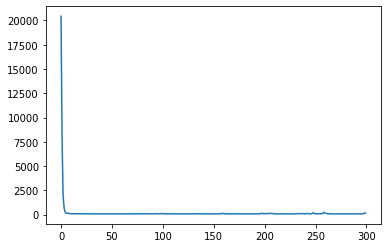

In [28]:
plt.plot(history.history['loss'])